#What Makes a Song Good or Bad
* Independent Project by Alex Monaghan
* Professor Davis
* Applied Time Series Analysis
* 10 May 2021

##1) Required Packages

In [2]:
install.packages('tswge')
library('tswge')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’




In [3]:
install.packages('tuneR')
library('tuneR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##2) Introduction

For my independent research project, I will be utilizing the data file from lab 3 along with a new data file.  This is because the song that I analyzed for the last lab is arguably one of the worst songs of all time.  The song, "Friday" by Rebecca Black (can be found at https://www.youtube.com/watch?v=kfVsfOSbJY0), gained popularity in 2011 through Youtube.  It became a meme, and the artist, Rebecca Black, ended up becoming a victim to cyberbullying.  I decided that I would compare what is considered to possibly be the worst song of 2011, to "Rolling in the Deep" by Adele (can be found at https://www.youtube.com/watch?v=rYEDA3JcQqw), a song that was the most popular of the same year.  I aim to do this by creating realizations of amplitude over time at three different intervals of each song, in addition I will plot the frequency and lag at the same intervals.  Finally, I will filter the results based on a high and low pass for the middle intervals of both songs.

####2.1) Methodology

1. Load the Data
2. Create 3 Intervals for Each Song (Start, Middle, and End)
3. Plot the Amplitude over Time for Each
4. Plot Autocorrelations and Frequency
5. Apply Filters
6. Analyze Results and Draw Conclusions


##3) Methods

####3.1) Loading the Data for Friday and Rolling in the Deep

In [4]:
friday <- readMP3("/content/friday.mp3")
rd <- readMP3("/content/Adele.mp3")

In [5]:
str(friday)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:10015488] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:10015488] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [6]:
str(rd)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:11021184] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:11021184] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 48000
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


####3.2) Respective Song Lengths

Since the two audio files came back as being TRUE for stereo output, the left channel is separated from the right to be analyzed.

In [7]:
fridaySamples <- length(friday@left)
cat(paste("Minutes in Friday:",(fridaySamples / friday@samp.rate / 60), "\n"))
rdSamples <- length(rd@left)
cat(paste("Minutes in Rolling in the Deep:", (rdSamples / rd@samp.rate / 60)))

Minutes in Friday: 3.78514285714286 
Minutes in Rolling in the Deep: 3.8268

####3.3) Amplitudes:

In [8]:
friLeft <- friday@left
friAmp <- friLeft / 2^(friday@bit - 1)
rdLeft <- rd@left
rdAmp <- rdLeft / 2^(rd@bit - 1)

####3.4) Times:

In [9]:
friTime <- (0:(fridaySamples - 1)) / friday@samp.rate
rdTime <- (0:(rdSamples - 1)) / rd@samp.rate

####3.5) Realizations for the Start of the Songs

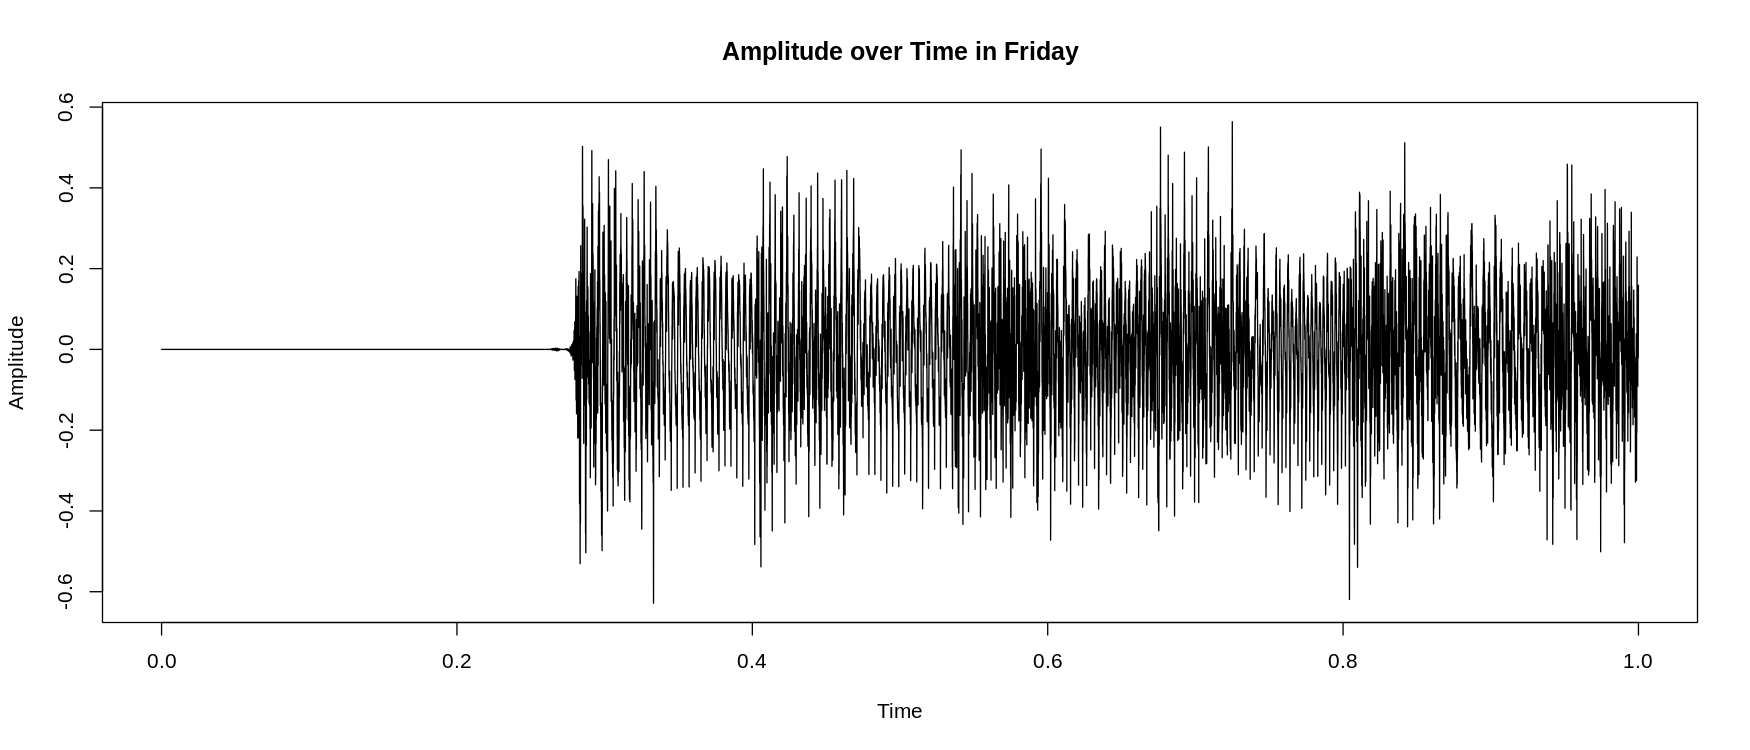

In [10]:
friAmpSnip <- friAmp[1:44100]
friTimeSnip <- friTime[1:44100]
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(friTimeSnip, friAmpSnip, type='l', xlab='Time', ylab='Amplitude', main='Amplitude over Time in Friday')

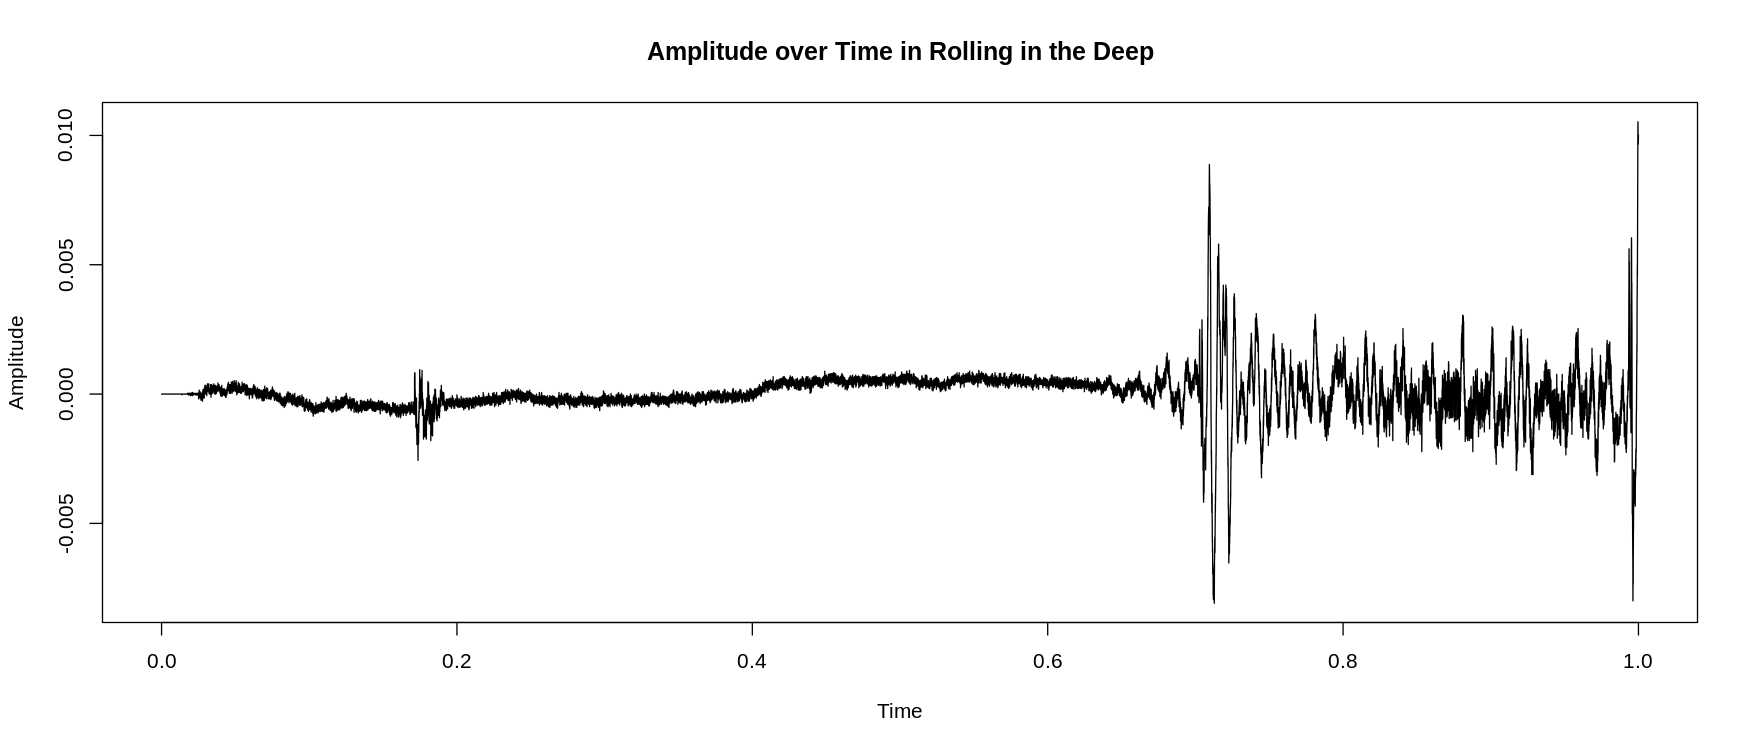

In [32]:
rdAmpSnip <- rdAmp[1:48000]
rdTimeSnip <- rdTime[1:48000]
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(rdTimeSnip, rdAmpSnip, type='l', xlab='Time', ylab='Amplitude', main='Amplitude over Time in Rolling in the Deep')

####3.6) Realizations for the Middle of the Songs

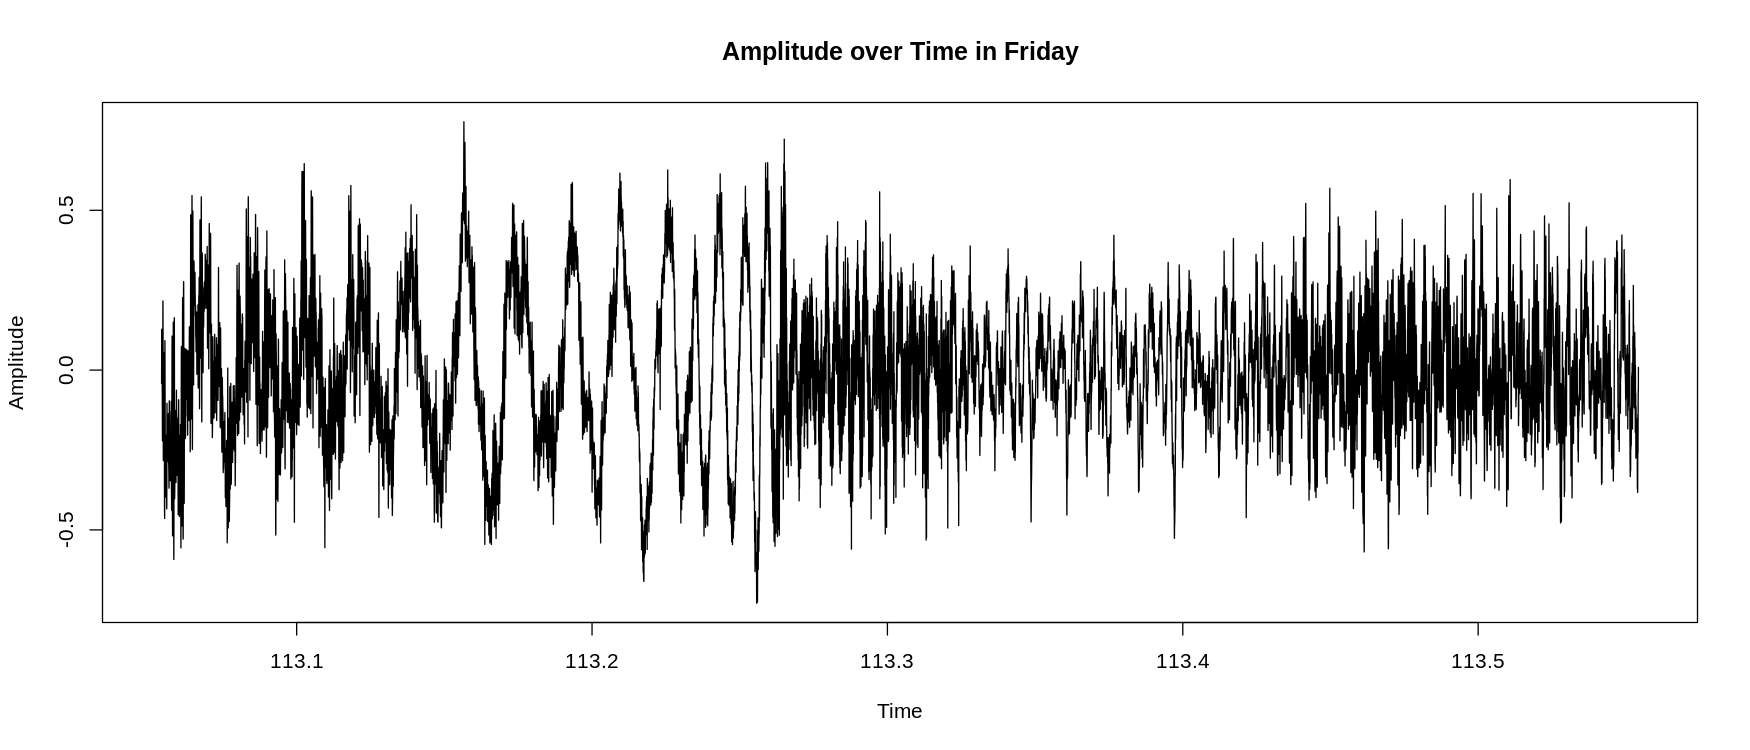

In [12]:
friAmpSnip <- friAmp[5007744:5029794]
friTimeSnip <- friTime[5007744:4985694]
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(friTimeSnip, friAmpSnip, type='l', xlab='Time', ylab='Amplitude', main='Amplitude over Time in Friday')

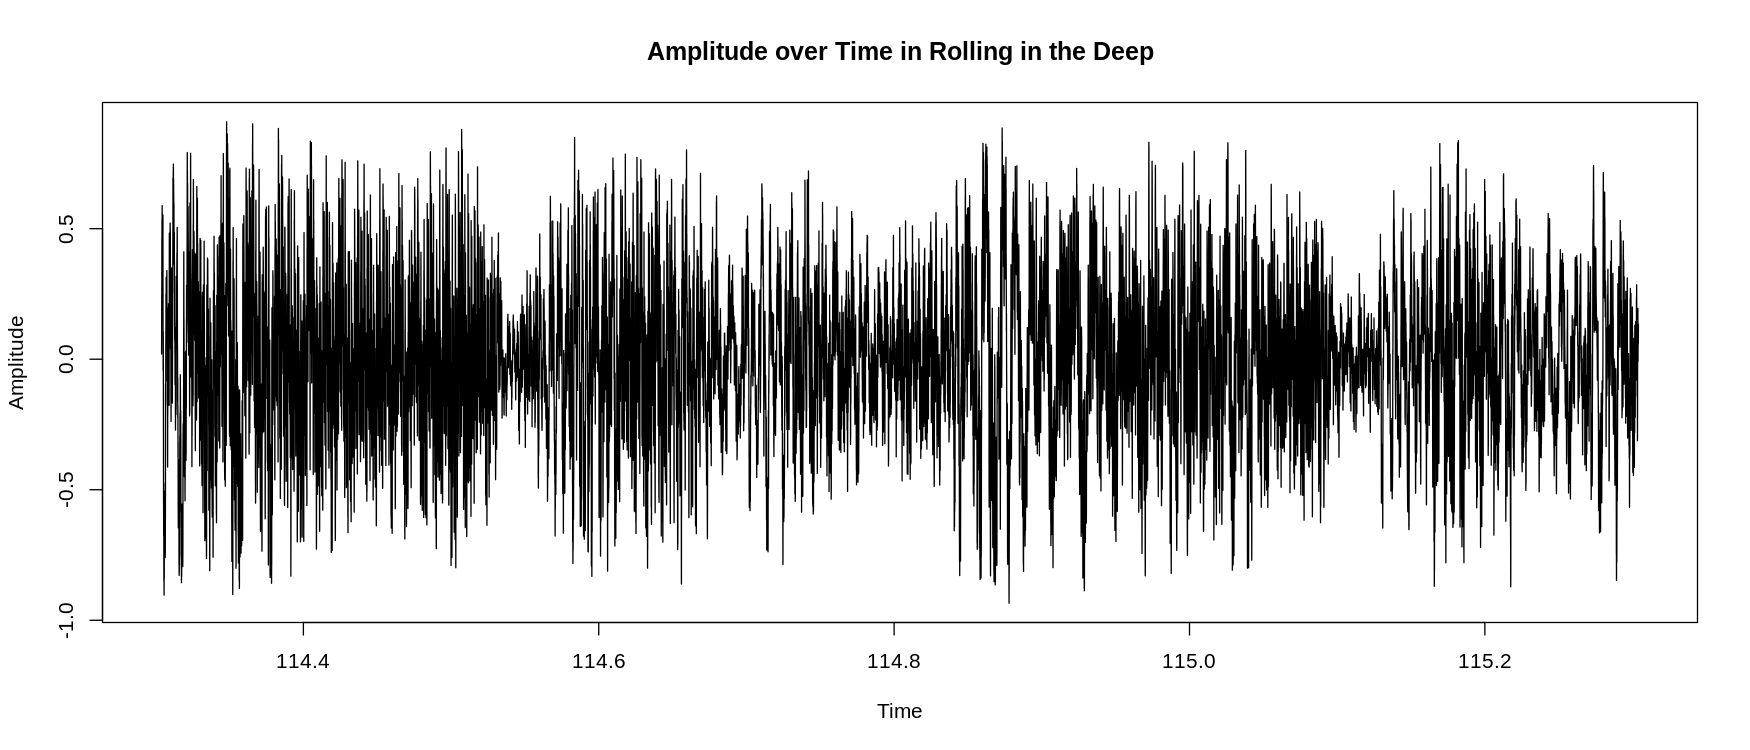

In [13]:
rdAmpSnip <- rdAmp[5486592:5534592]
rdTimeSnip <- rdTime[5486592:5534592]
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(rdTimeSnip, rdAmpSnip, type='l', xlab='Time', ylab='Amplitude', main='Amplitude over Time in Rolling in the Deep')

####3.7) Realizations for the End of the Songs

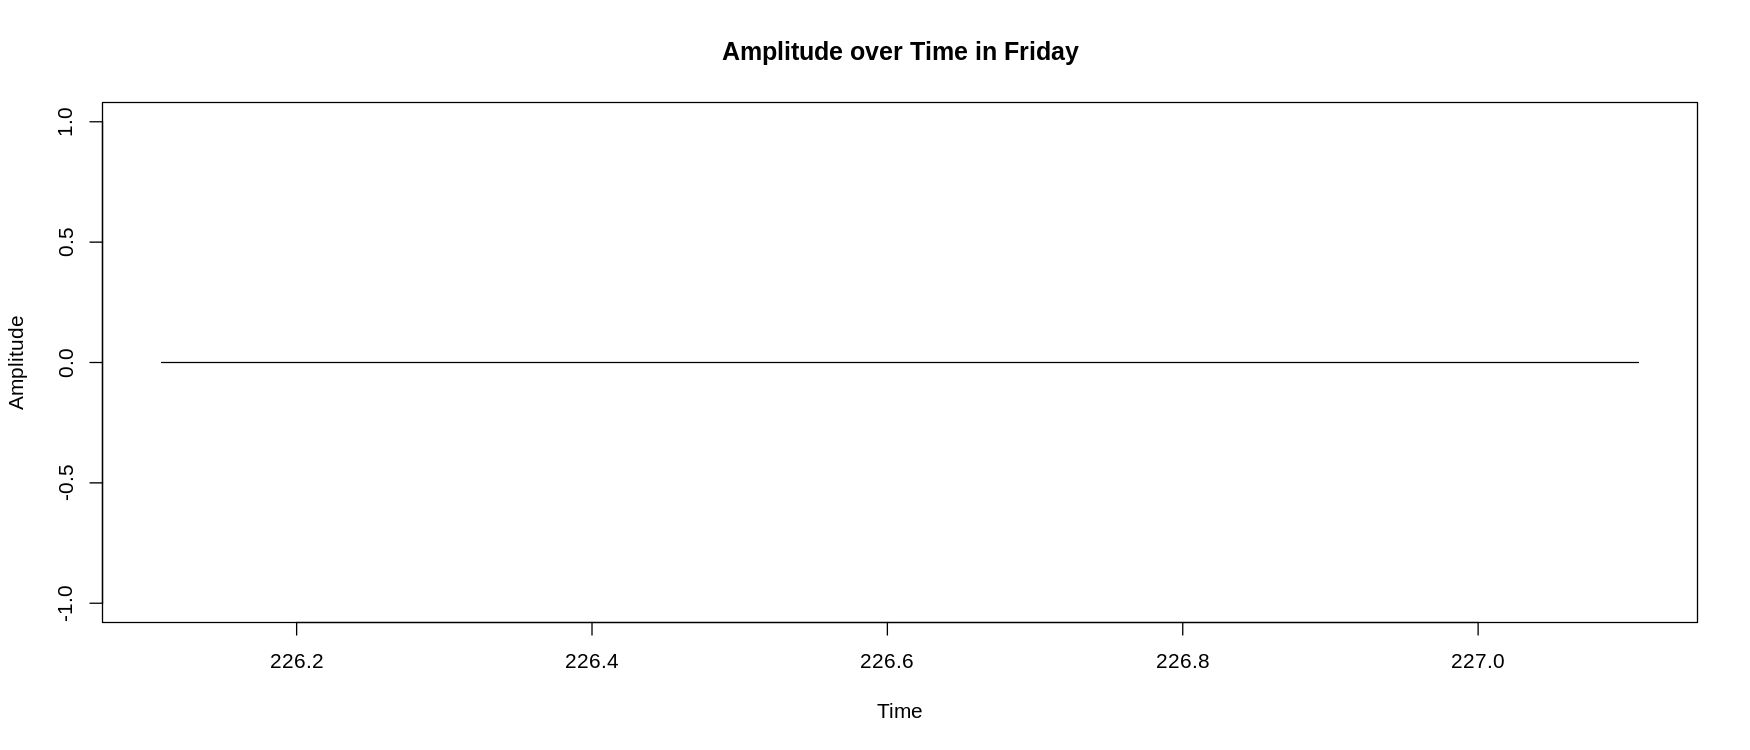

In [14]:
friAmpSnip <- friAmp[9971388:10015488]
friTimeSnip <- friTime[9971388:10015488]
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(friTimeSnip, friAmpSnip, type='l', xlab='Time', ylab='Amplitude', main='Amplitude over Time in Friday')

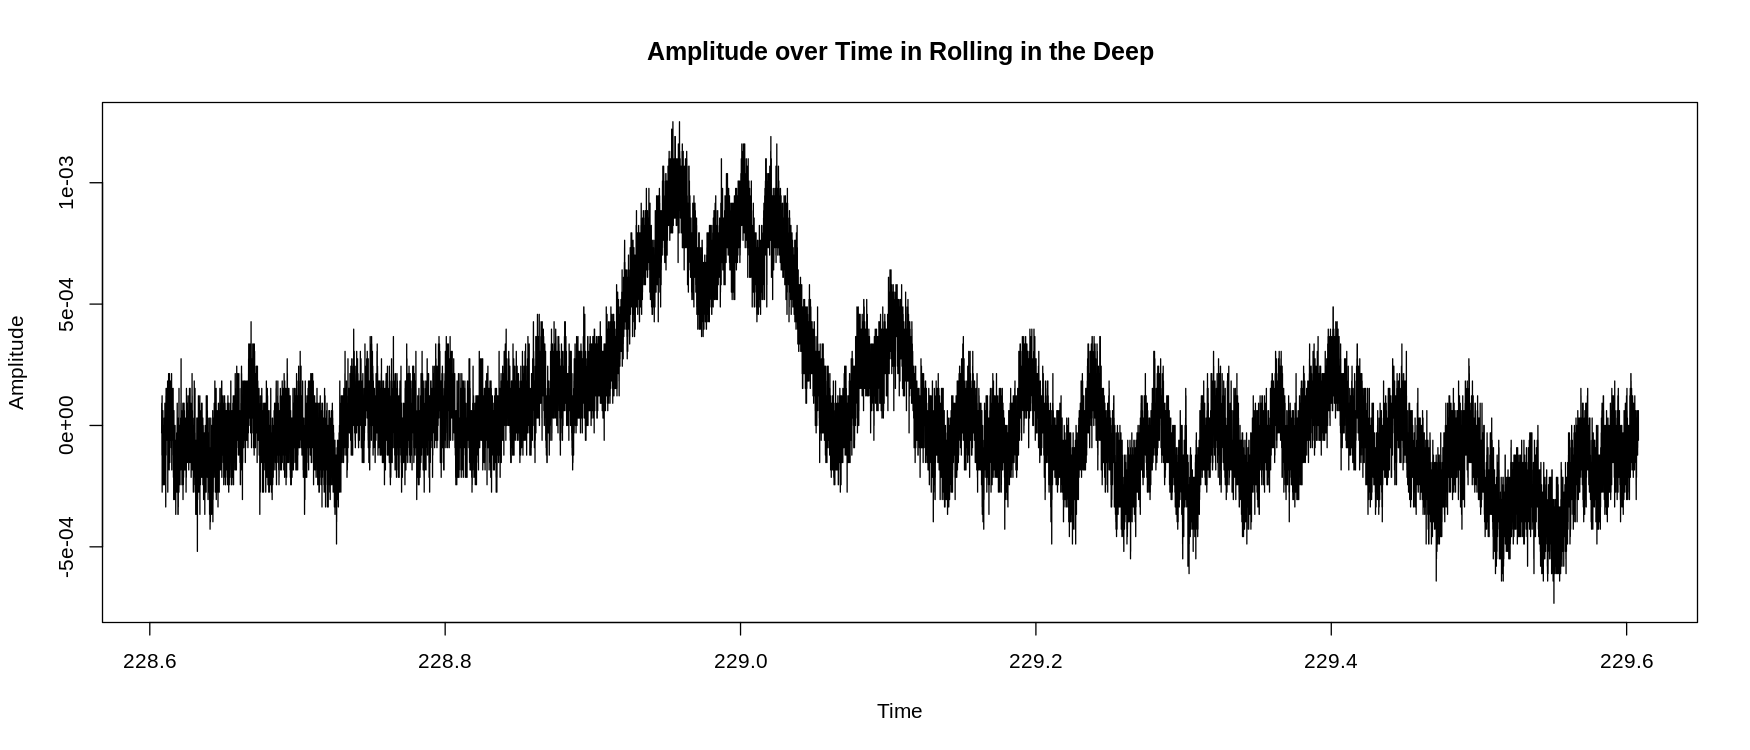

In [15]:
rdAmpSnip <- rdAmp[10973184:11021184]
rdTimeSnip <- rdTime[10973184:11021184]
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(rdTimeSnip, rdAmpSnip, type='l', xlab='Time', ylab='Amplitude', main='Amplitude over Time in Rolling in the Deep')

####3.8) Summary Statistics

In [16]:
cat(paste("Bit Depth:",friday@bit,"\n"))
cat(paste("Sampling Rate:",friday@samp.rate,"Hz\n"))
cat(paste("Number of Samples:",fridaySamples,"\n"))

Bit Depth: 16 
Sampling Rate: 44100 Hz
Number of Samples: 10015488 


In [17]:
cat(paste("Bit Depth:",rd@bit,"\n"))
cat(paste("Sampling Rate:",rd@samp.rate,"Hz\n"))
cat(paste("Number of Samples:",rdSamples,"\n"))

Bit Depth: 16 
Sampling Rate: 48000 Hz
Number of Samples: 11021184 


##4) Results

####4.1) Defining the Sample Intervals

In [18]:
friStart <- friAmp[1:44100]
friMid <- friAmp[5007744:5029794]
friEnd <- friAmp[9971388:10015488]
rdStart <-rdAmp[1:4800]
rdMid <- rdAmp[5486592:5534592]
rdEnd <- rdAmp[10973184:11021184]

####4.2) Friday Start and Middle Plots (No end because it is empty)

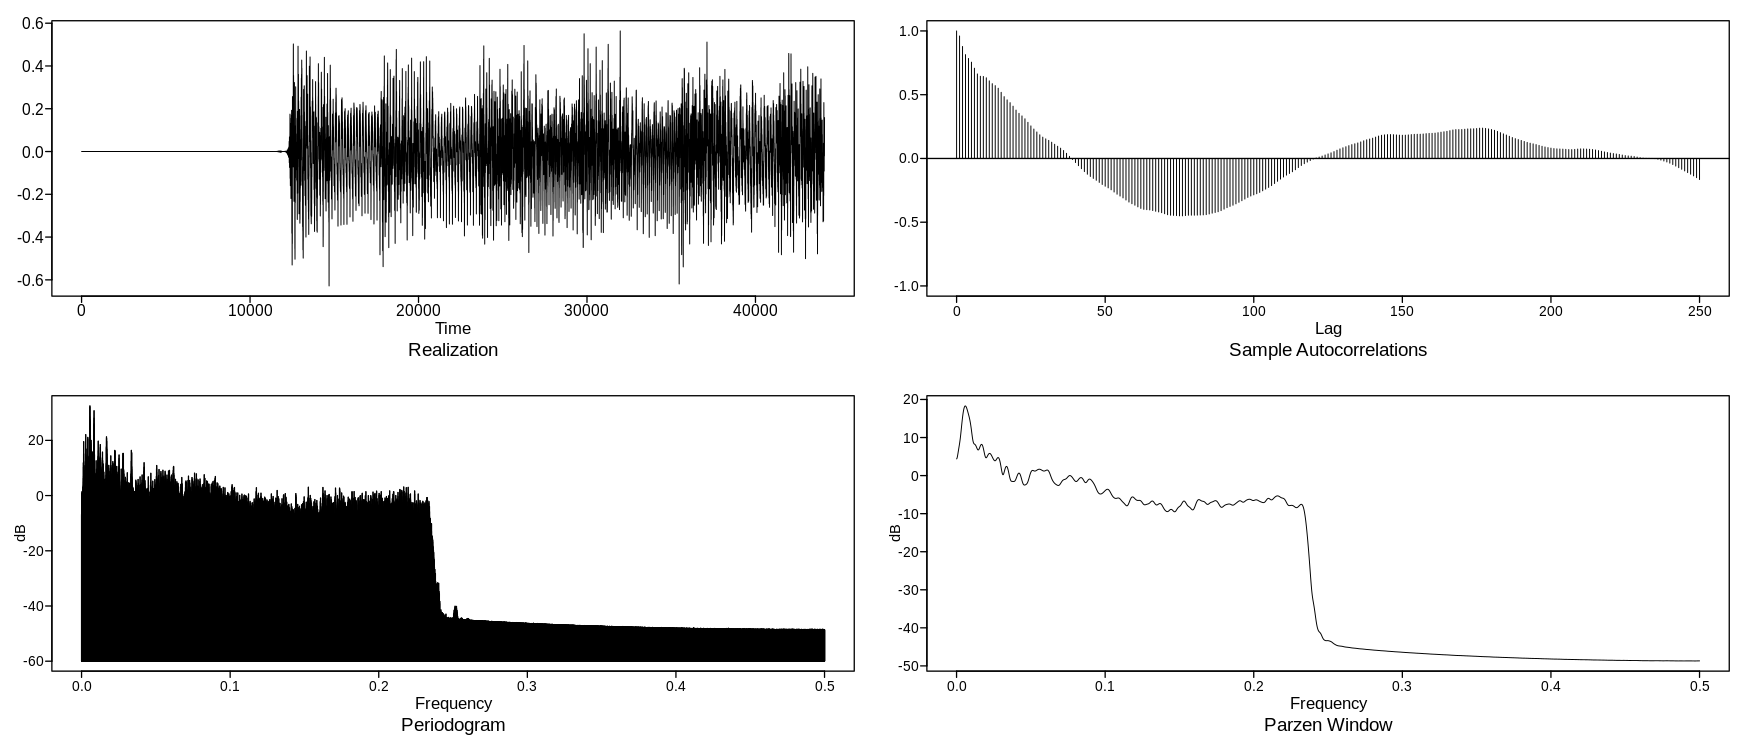

In [19]:
friStartNorm.plots <- plotts.sample.wge(friStart, lag.max = 250)

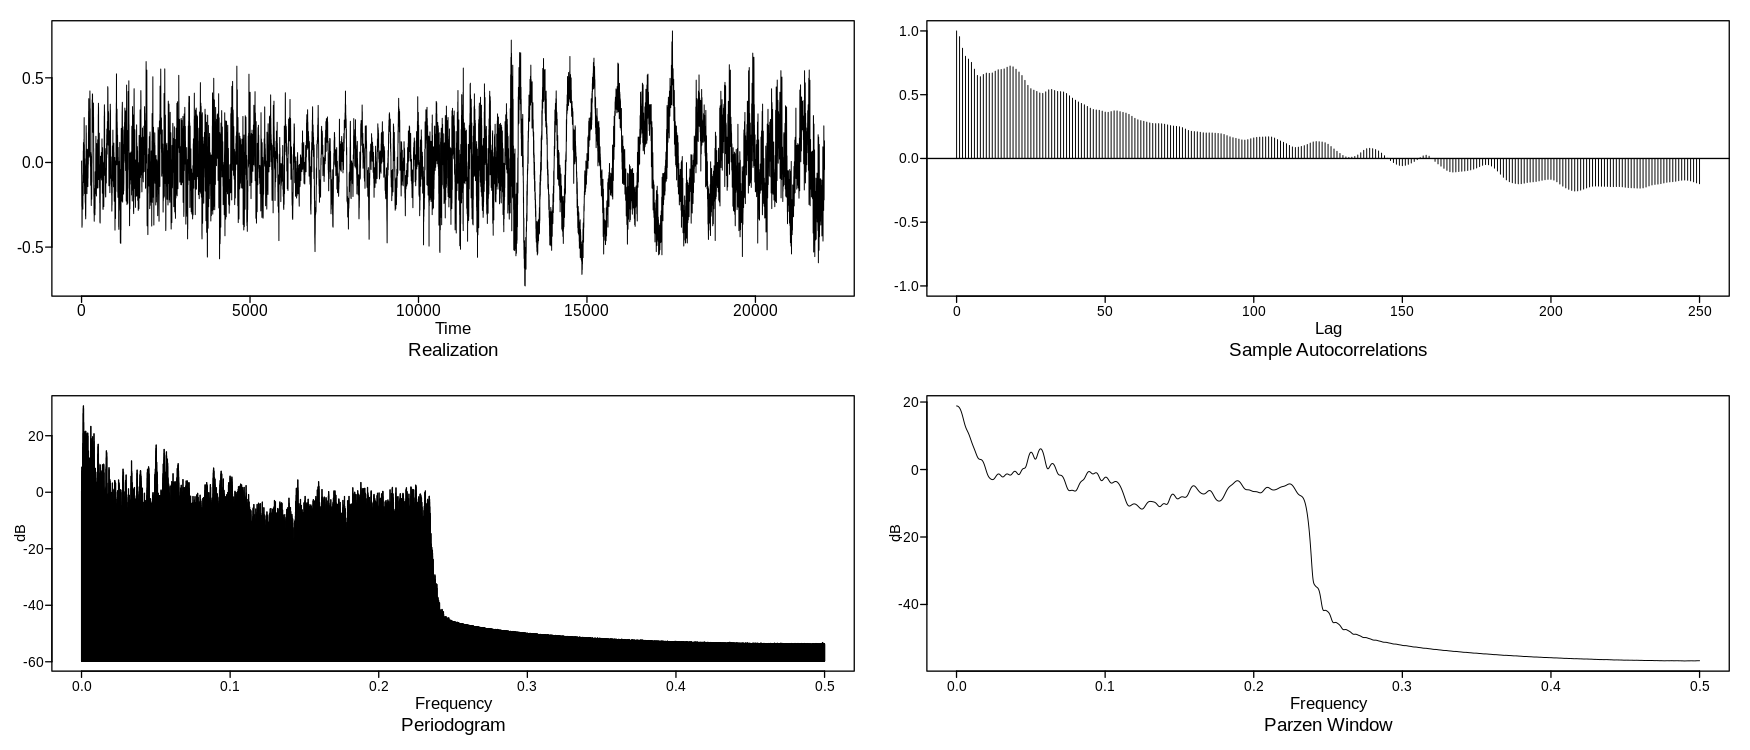

In [20]:
friMidNorm.plots <- plotts.sample.wge(friMid, lag.max = 250)

Excluded the plots for the end of Friday since it is empty

In [21]:
#friEndNorm.plots <- plotts.sample.wge(friEnd, lag.max = 250)

####4.3) Rolling in the Deep Start, Middle, and End Plots

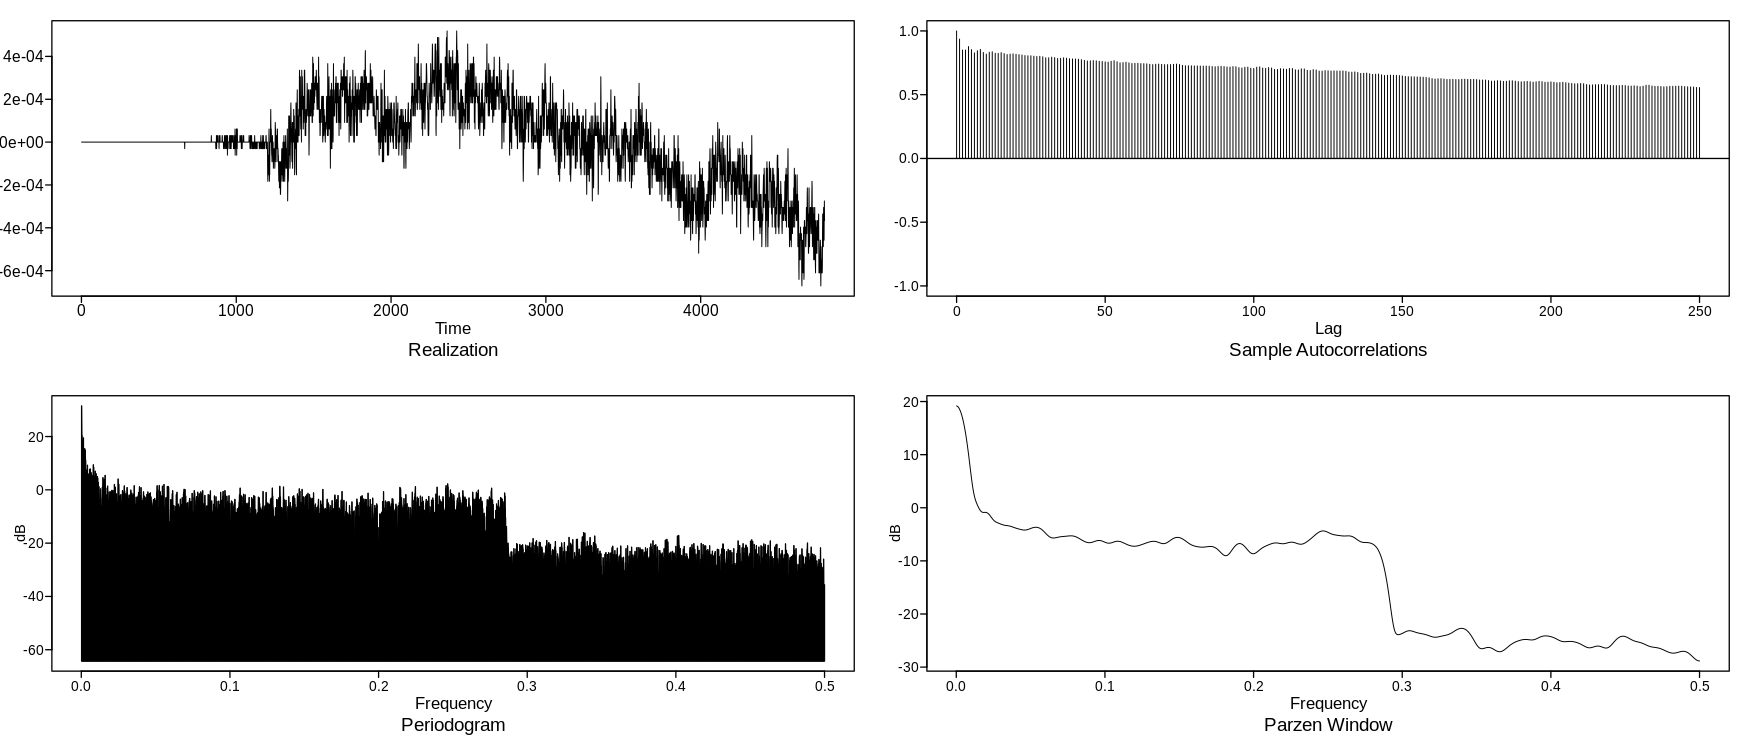

In [22]:
rdStartNorm.plots <- plotts.sample.wge(rdStart, lag.max = 250)

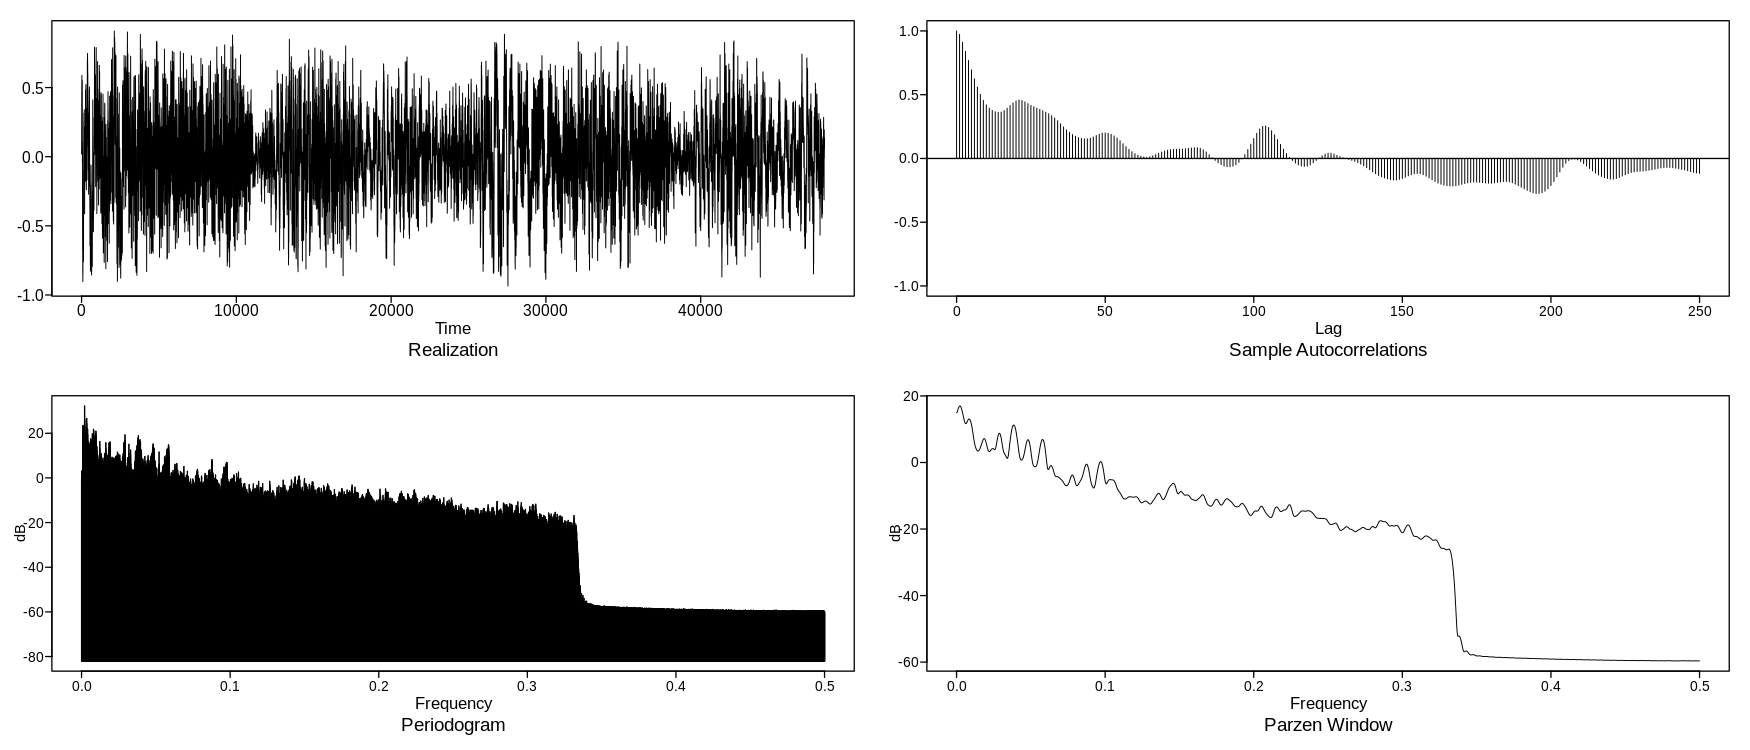

In [23]:
rdMidNorm.plots <- plotts.sample.wge(rdMid, lag.max = 250)

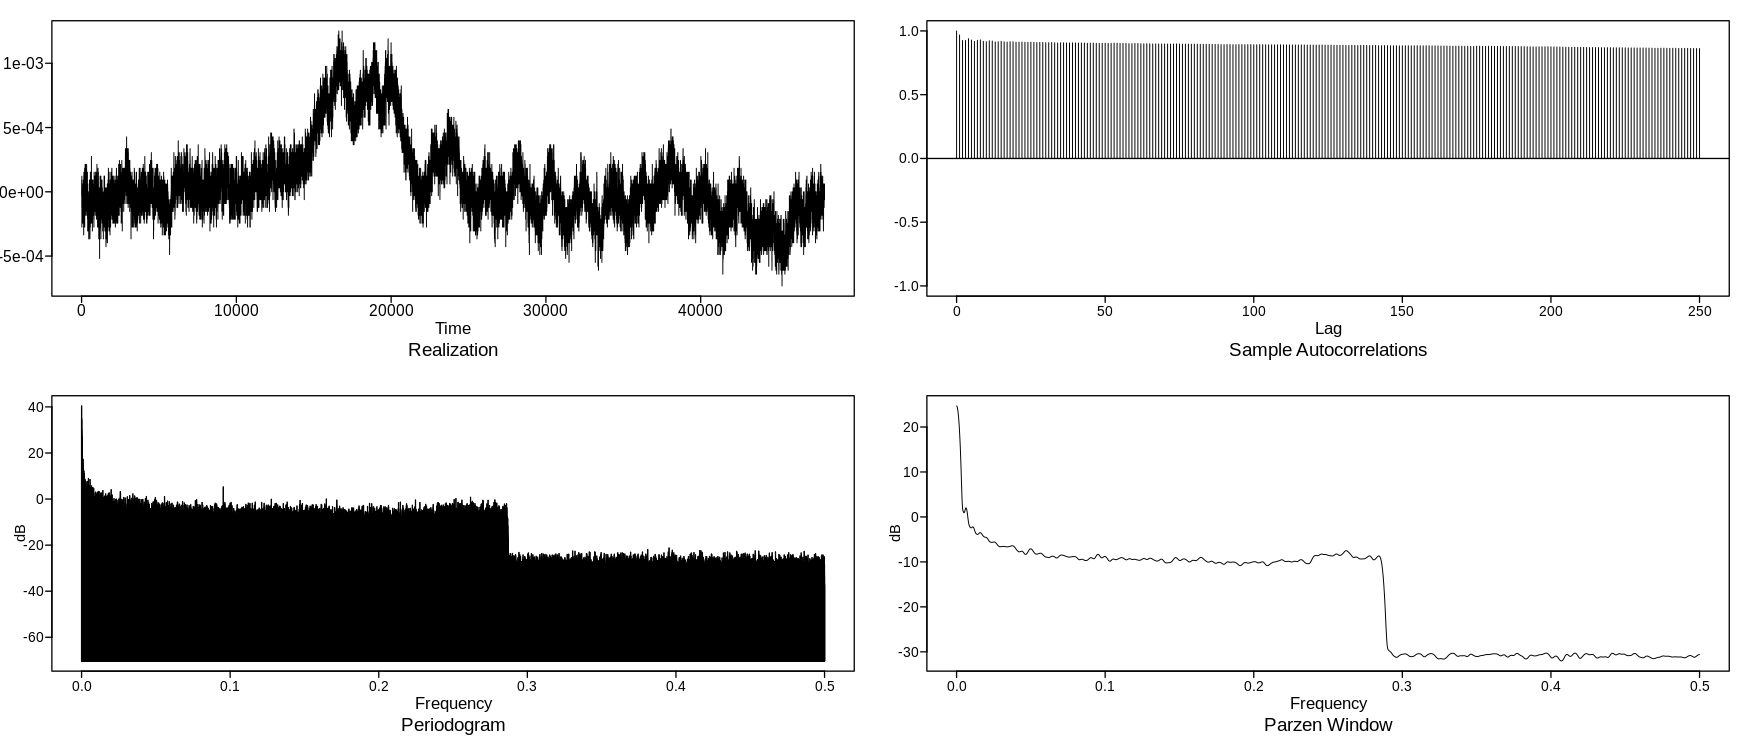

In [24]:
rdEndNorm.plots <- plotts.sample.wge(rdEnd, lag.max = 250)

####4.4) High and Low Filters

In [25]:
friMid.high <- butterworth.wge(friMid, 4, type = 'high', cutoff = 0.15, plot = FALSE)
friMid.low <- butterworth.wge(friMid, 4, type = 'low', cutoff = 0.05, plot = FALSE)
rdMid.high <- butterworth.wge(rdMid, 4, type = 'high', cutoff = 0.15, plot = FALSE)
rdMid.low <- butterworth.wge(rdMid, 4, type = 'low', cutoff = 0.05, plot = FALSE)

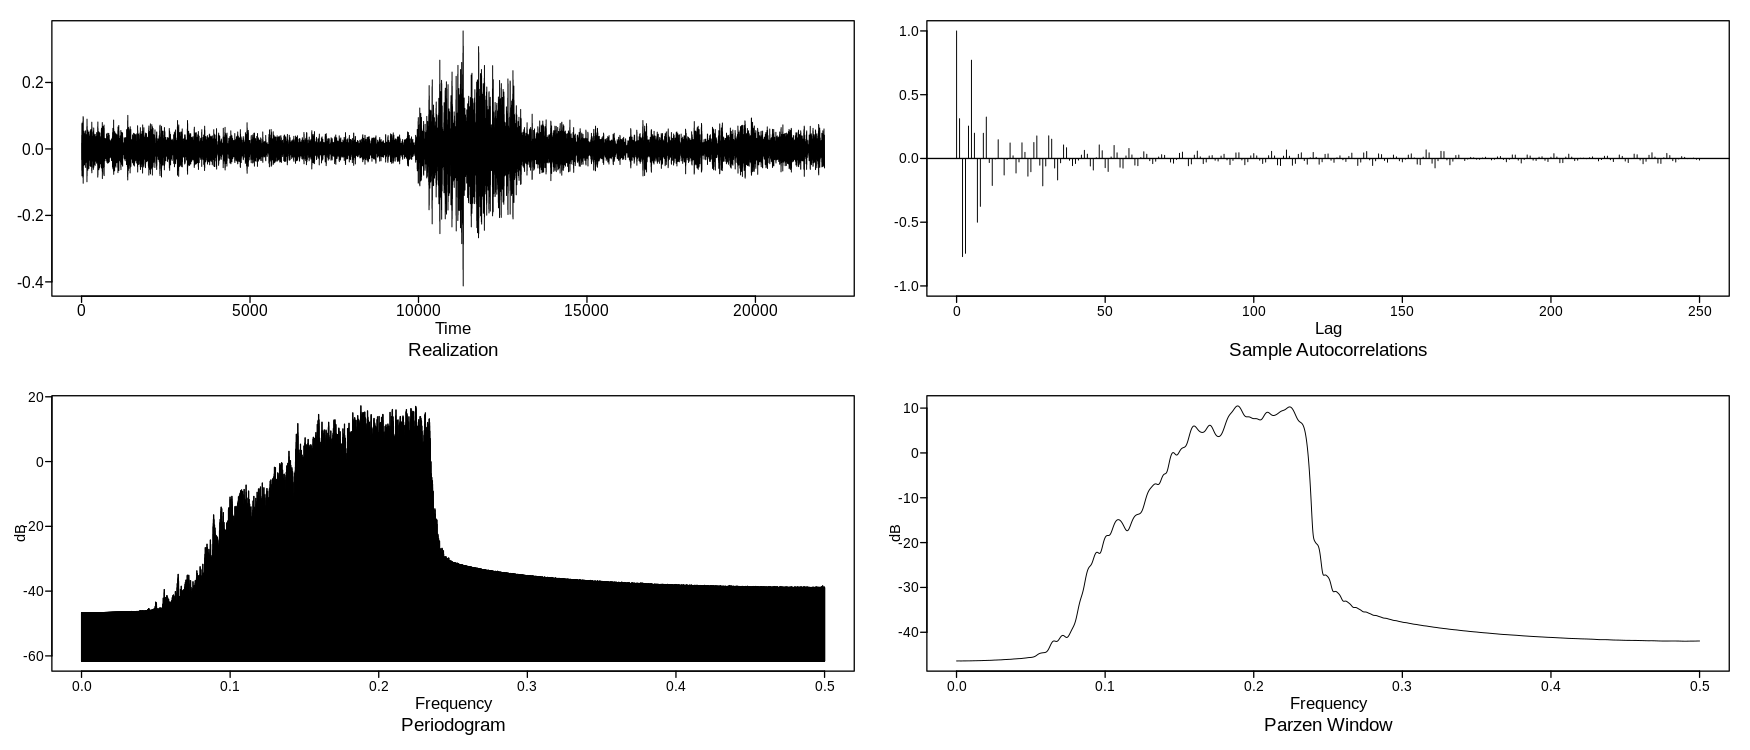

In [26]:
friHigh.plots <- plotts.sample.wge(friMid.high$x.filt, lag.max = 250)

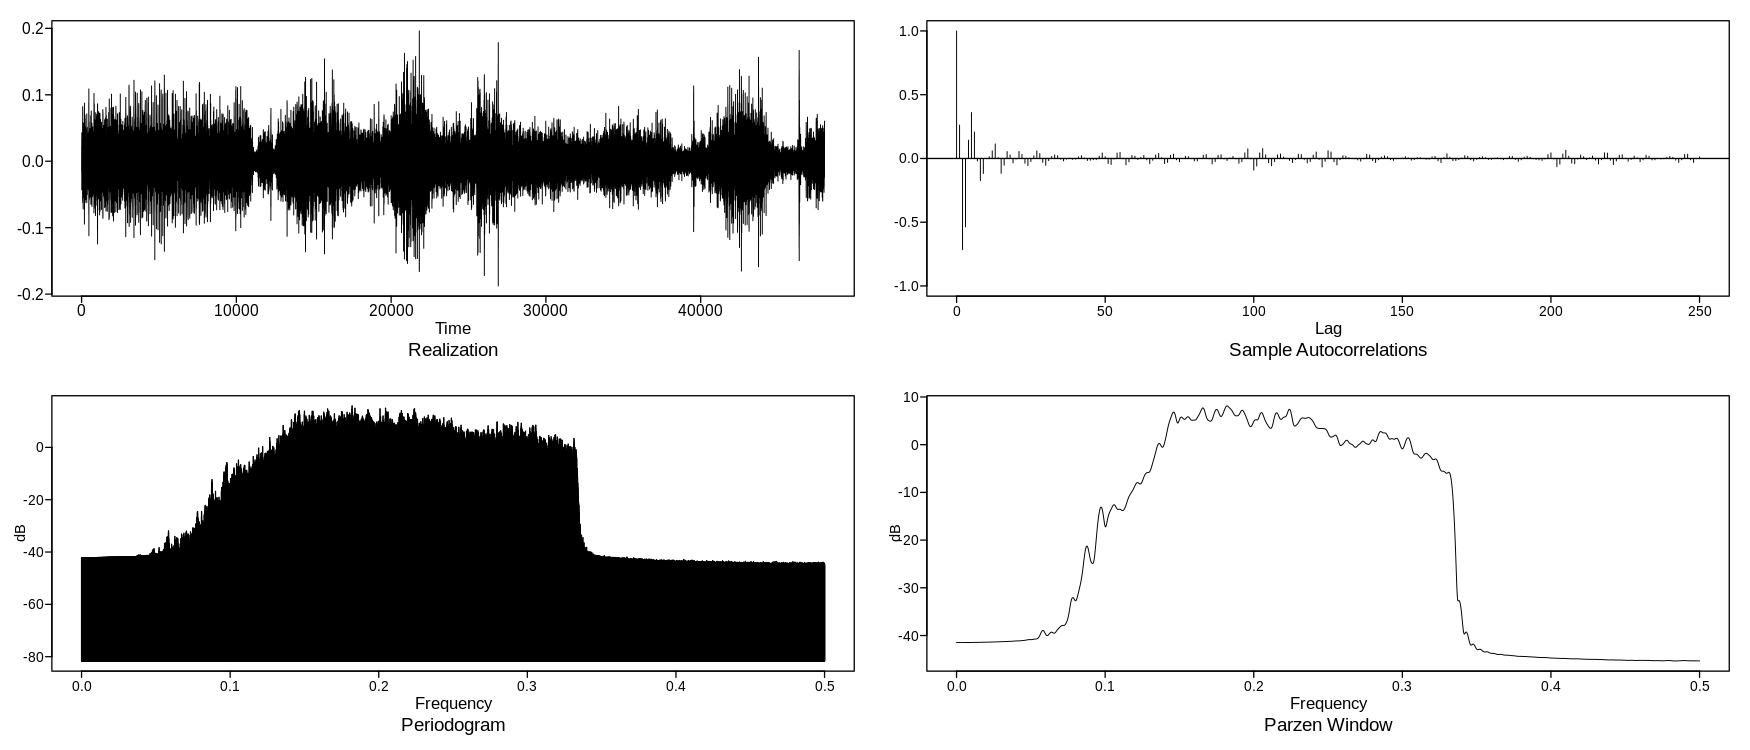

In [27]:
rdHigh.plots <- plotts.sample.wge(rdMid.high$x.filt, lag.max = 250)

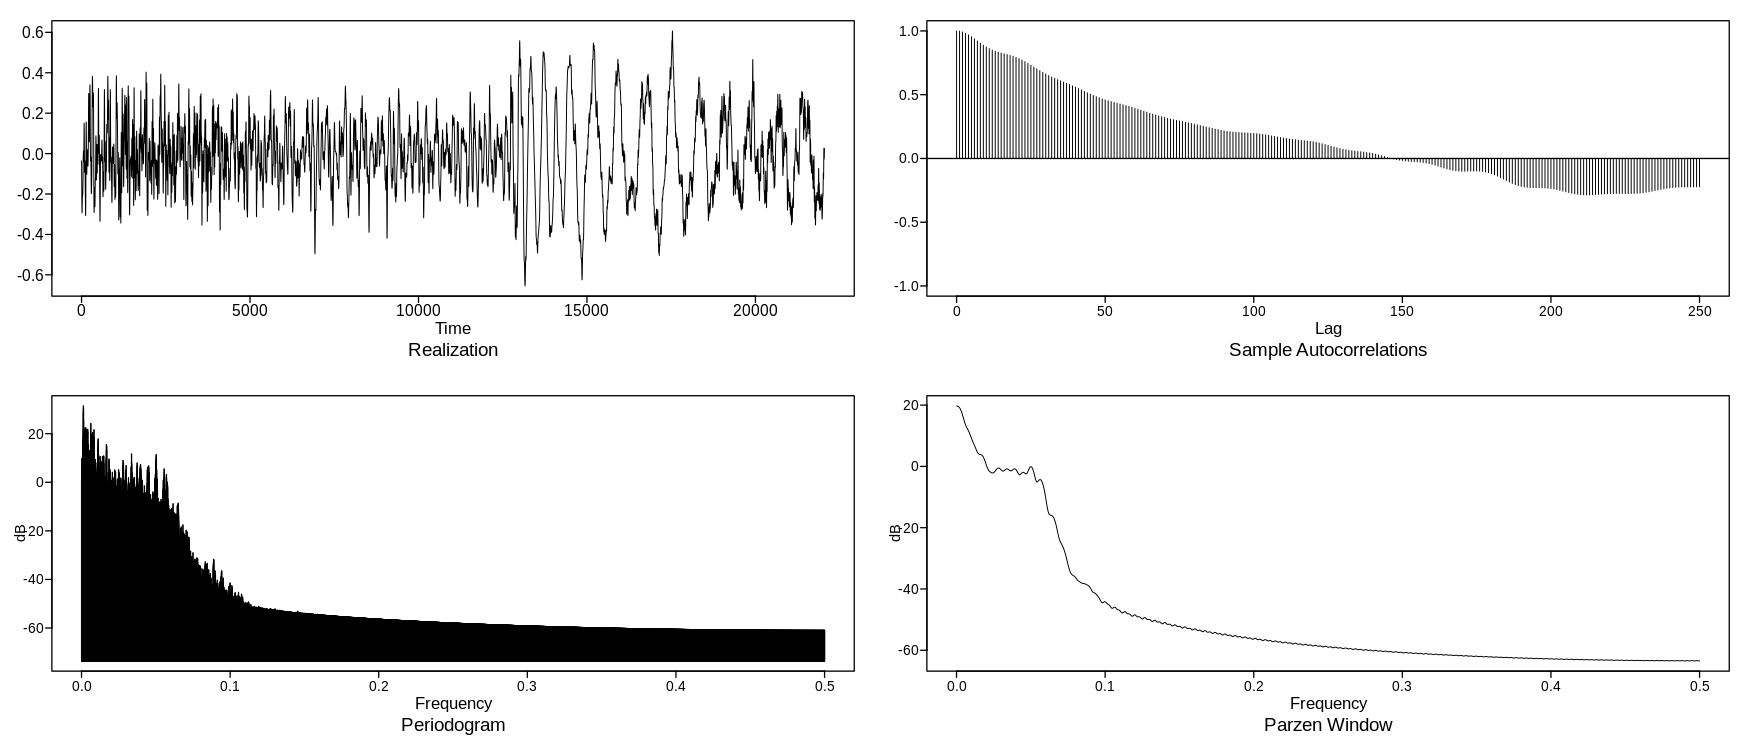

In [28]:
friLow.plots <- plotts.sample.wge(friMid.low$x.filt, lag.max = 250)

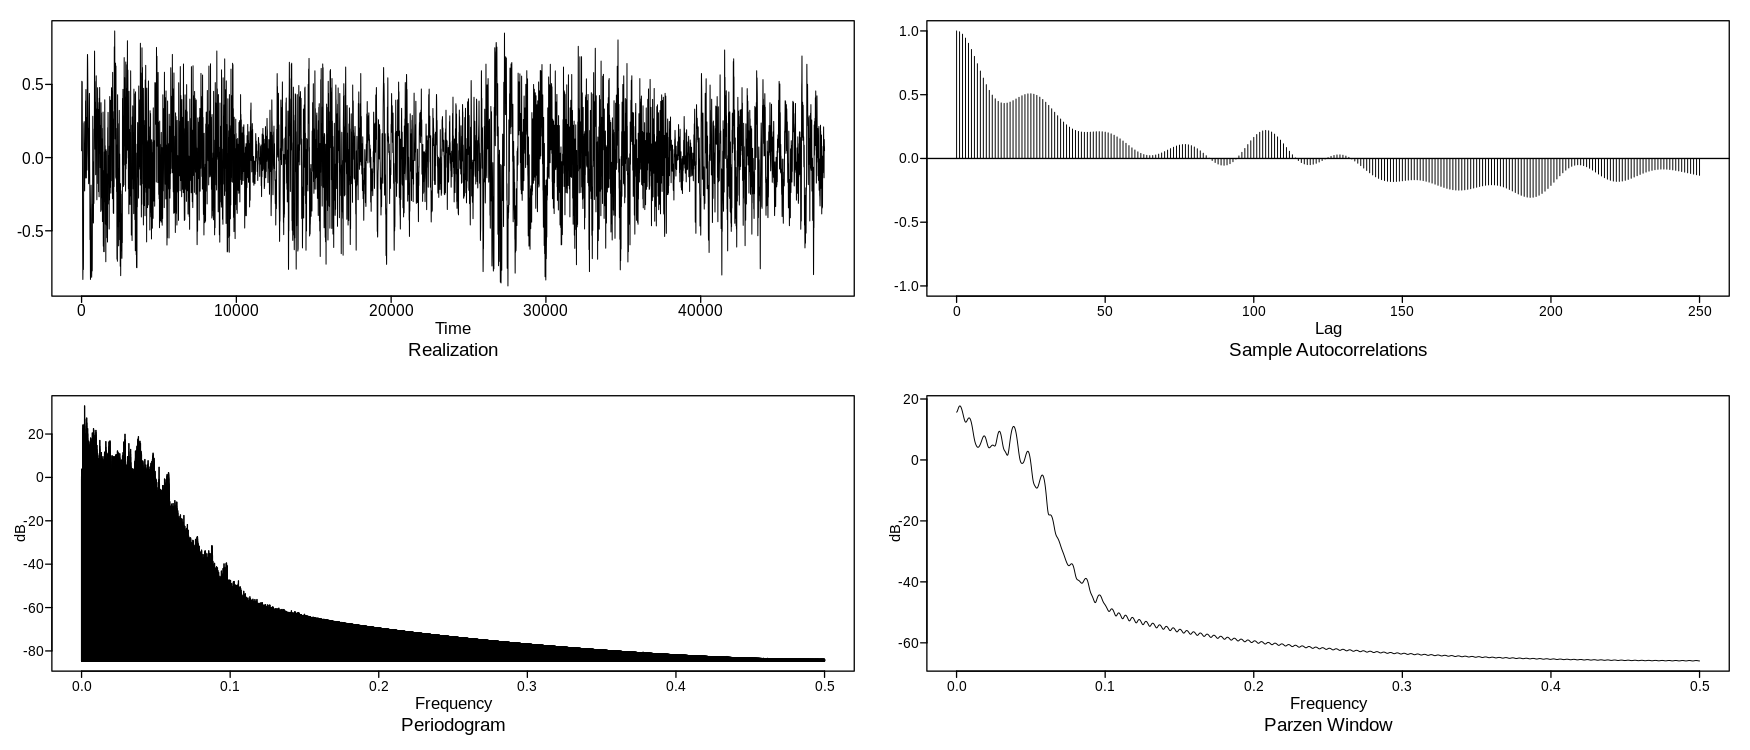

In [29]:
rdLow.plots <- plotts.sample.wge(rdMid.low$x.filt, lag.max = 250)

##5) Conclusion

In order to analyze and compare Friday by Rebecca Black to Rolling in the Deep by Adele, I first loaded the appropriate packages along with the audio files.  I then assessed the songs lengths and they were actually both around 3.8 minutes long.  Since both mp3 files were stereo audio, I solo'd out the "left" audio in order to analyze the data better.  I then created realizations for a period of one sample rate for each of the songs (44100 Hz for Friday and 48000 Hz for Rolling in the Deep).  I decided to take snippets from the beginning, middle, and end of both songs in order to do this.  Some key differences were that Friday seemed to just blast music from the start, instead of easing into it, had a period at the end with no music along with an odd intro (optimized to be a YouTube music video), and overall seemed to not have as smooth of an amplitude as Rolling in the Deep.  Obviously, Rolling in the Deep underwent a proper sound engineering process; Which is perhaps why the amplitude of the audio file seems much smoother across the board, rather than simply making leaps up and down.  This is confirmed when analyzing the frequencies as well, since Rolling in the Deep appears to cover a larger range.  Both audio files appear to follow a somewhat periodic behavior as well, but I would have expected this since I would assume that tempo would influence the amplitude.  The BPM (measurement of tempo expressed as "Beats per Minute") of Friday (112) is slightly faster than Rolling in the Deep (105) as well, although the tempo can be felt in both songs, it is definitely more dominant in Rolling in the Deep, emphasized by drums, piano, and a tamborine.  This acts as a metronome for most of the song.  In the future I would like to attempt to analyze the BPM of more songs since there is actually research regarding BPM's and heartrate which could have had a big impact on song popularity as well.

##6) References

1.   Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge

2.   Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html

3.   Davis, T. (2021). Applied Time Series Analysis: Course Notebook - Student Copy Lesson 3 [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1qIdpd_8WFct9zBZ5uwO_Bcg-F3svu0KJ?usp=sharing.

4.   Davis, T. (2021). Applied Time Series Analysis: Code Snippets - Analyzing Audio Files [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1IuULZkusjNlO-LMrPhNfiq3UGKWauDCi?usp=sharing. item item

5. Black, Rebecca. "Friday". 2011. Soundboard, https://www.soundboard.com/sb/sound/359637

6. Adele. "Rolling in the Deep". 2011. Internet Archive, https://archive.org/download/RollingInTheDeep_457